<a href="https://colab.research.google.com/github/GoroCollins/machine-learning/blob/top-down-codes/Exercises/Exercise%204%20-%20Handling%20Complex%20Images/Exercise%204-Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [18]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

--2022-10-16 05:40:16--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.251.18.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2022-10-16 05:40:16 (129 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [9]:
# Directory with training happy images
train_happy_dir = os.path.join('/tmp/h-or-s/happy')
# Directory with training sad images
train_sad_dir = os.path.join('/tmp/h-or-s/sad')

In [10]:
# Number of the training images
print(f'Number of happy images: {len(os.listdir(train_happy_dir))}')
print(f'Number of sad images: {len(os.listdir(train_sad_dir))}')

Number of happy images: 40
Number of sad images: 40


In [12]:
# Names of the files
happy_images = os.listdir(train_happy_dir)
print(f'Happy images:\n{happy_images[:10]}')
sad_images = os.listdir(train_sad_dir)
print(f'Sad images:\n{sad_images[:10]}')

Happy images:
['happy1-09.png', 'happy1-01.png', 'happy1-03.png', 'happy2-07.png', 'happy2-05.png', 'happy1-14.png', 'happy1-07.png', 'happy1-10.png', 'happy1-16.png', 'happy2-10.png']
Sad images:
['sad1-18.png', 'sad1-09.png', 'sad2-02.png', 'sad2-03.png', 'sad1-05.png', 'sad2-19.png', 'sad1-11.png', 'sad1-16.png', 'sad2-10.png', 'sad1-06.png']


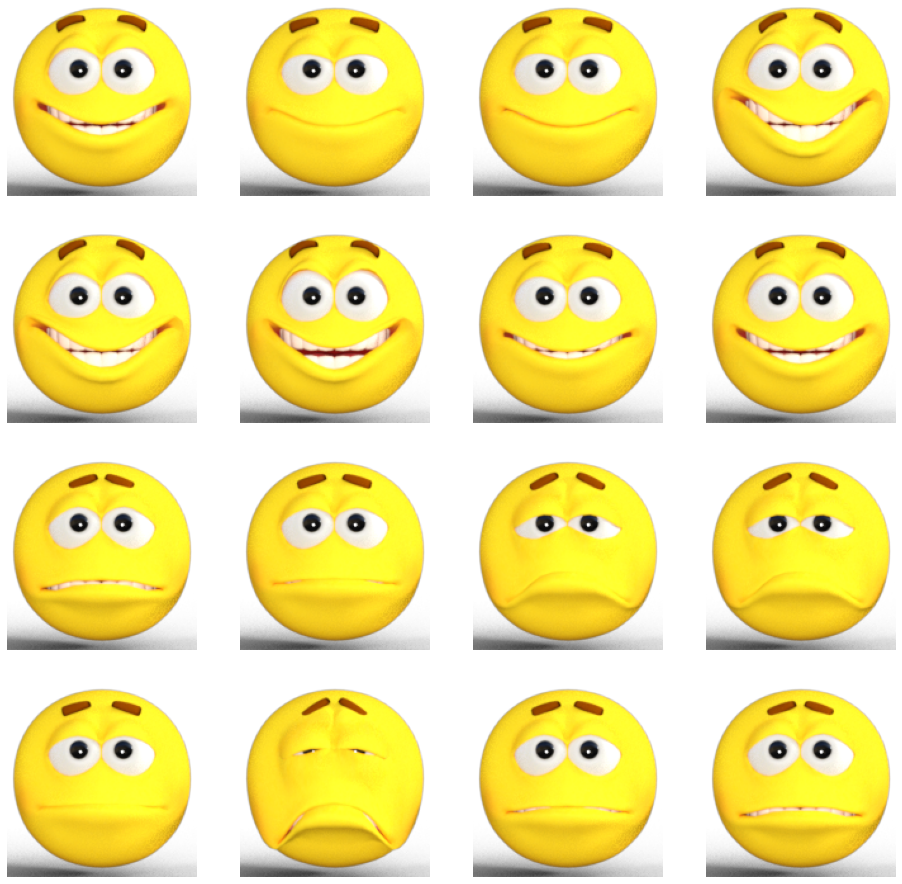

In [13]:
# Plotting the images
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in happy_images[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in sad_images[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [14]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(96, (3,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [15]:
# How the feature changes with each layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 96)       0

In [20]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255) # Normalizing the image pixels

train_generator = train_datagen.flow_from_directory(
    '/tmp/h-or-s/',
    target_size=(300, 300),
    batch_size=10,
    class_mode='binary'
)

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


**Epoch** is the number times the learning algorithm will work through the entire training data set.  
**steps_per_epoch** is the total number of samples in your training data set divided by the batch size.

In [22]:
# This code block should call model.fit and train for
# a number of epochs. 
history = model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch = 4,
    callbacks=[callbacks]
)    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/20
4/4 [==============================] - 7s 1s/step - loss: 50.4118 - accuracy: 0.5250
Epoch 2/20
4/4 [==============================] - 5s 1s/step - loss: 129.8703 - accuracy: 0.5500
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 6.4612 - accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 5s 1s/step - loss: 2.3390 - accuracy: 0.5500
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.1395 - accuracy: 0.9750
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.0898 - accuracy: 0.9750
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 0.1082 - accuracy: 0.9500
Epoch 8/20
4/4 [==============================] - 5s 1s/step - loss: 0.2025 - accuracy: 0.9000
Epoch 9/20
4/4 [==============================] - 5s 1s/step - loss: 0.2234 - accuracy: 0.9250
Epoch 10/20
4/4 [==============================] - 6s 1s/step - loss: 2.0082 - accuracy: 0.6500
Epoch 11/20
4/4 [=============================